In [2]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))


In [3]:
def loss_func(x, t):
    delta = 1e-7 # log 무한대 발산 방지 
    z = np.dot(x, W) + b
    y = sigmoid(z)
    # cross-entropy
    return -np.sum(t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ))  #크로스 엔트로피

In [5]:
def predict(test_data):
    z = np.dot(test_data, W) + b 
    y = sigmoid(z)
    if y >= 0.5:
        result = 1 # Pass
    else:
        result = 0 # Fail
    return y, result

In [7]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x) #수치미분된 값 저장할 ndarray로 x와 같은 크기의 0으로 된 배열 생성
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x 
        fx1 = f(x) # f(x+delta_x)
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        x[idx] = tmp_val
        it.iternext() # 다음 인덱스로 이동
    return grad

In [8]:
import numpy as np
from datetime import datetime


In [9]:
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10,1)
W = np.random.rand(1,1)
b = np.random.rand(1)
print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)


x_data.shape =  (10, 1) , t_data.shape =  (10, 1)
W =  [[0.57134365]] , W.shape =  (1, 1) , b =  [0.11434365] , b.shape =  (1,)


In [12]:
learning_rate = 1e-2
f = lambda x : loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
start_time = datetime.now() 
for step in range(50001):
    W -= learning_rate * numerical_derivative(f, W) 
    b -= learning_rate * numerical_derivative(f, b) 
    if (step % 5000 == 0):
        print("step = ", step, "loss value = ", loss_func(x_data, t_data))

Initial loss value =  9.209236238678606
step =  0 loss value =  11.60835594804041
step =  5000 loss value =  0.8440840401278547
step =  10000 loss value =  0.6205240431147555
step =  15000 loss value =  0.5092189389679835
step =  20000 loss value =  0.4375941651308195
step =  25000 loss value =  0.3860083775280309
step =  30000 loss value =  0.3464170977130561
step =  35000 loss value =  0.31476218372498843
step =  40000 loss value =  0.28871675457013707
step =  45000 loss value =  0.26682544181779744
step =  50000 loss value =  0.24811900262659023


In [14]:
test_data = np.array([3.0]) # 3 시간에 대한 미래 값 예측
(real_val_1, logical_val_1) = predict(test_data)
print("시그모이드 결과 =>", real_val_1, ", 로지스틱회귀 결과 =>", logical_val_1) 
test_data = np.array([17.0]) # 17 시간에 대한 미래 값 예측
(real_val_2, logical_val_2) = predict(test_data)
print("시그모이드 결과 =>", real_val_2, ", 로지스틱회귀 결과 =>", logical_val_2)

시그모이드 결과 => [1.41103428e-09] , 로지스틱회귀 결과 => 0
시그모이드 결과 => [0.99974578] , 로지스틱회귀 결과 => 1


In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset = load_breast_cancer()
train = pd.DataFrame(dataset.data, columns=dataset.feature_names) 
target = pd.DataFrame(dataset.target, columns=["cancer"])
# 학습데이터와 타켓 데이터를 합쳐서 하나의 데이터 프레임 생성
data = pd.concat([train, target], axis=1)
data.info() # 데이터의 기본정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["mean radius"]],data[["cancer"]], random_state=42)
print(X_train) 
print('-------------------------------')
print(y_train) 
print('-------------------------------')

     mean radius
287       12.890
512       13.400
402       12.960
446       17.750
210       20.580
..           ...
71         8.888
106       11.640
270       14.290
435       13.980
102       12.180

[426 rows x 1 columns]
-------------------------------
     cancer
287       1
512       0
402       1
446       0
210       0
..      ...
71        1
106       1
270       1
435       0
102       1

[426 rows x 1 columns]
-------------------------------


In [18]:
from sklearn.linear_model import LogisticRegression # solver : 최적화에 사용핛 알고리즘 설정.
model = LogisticRegression(solver="liblinear") 
model.fit(X_train, y_train)


/Users/choejm/AI02/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [19]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print("mean radius 만으로 예측핚 결과: ", pred)
accuracy_score(y_test, pred)

mean radius 만으로 예측핚 결과:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

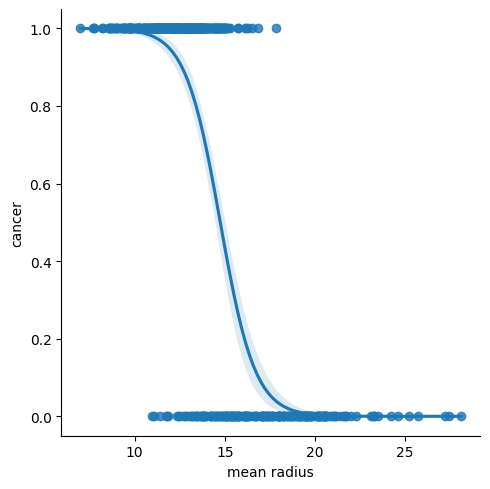

In [20]:
from seaborn import lmplot
import matplotlib.pyplot as plt
lmplot(x="mean radius", y="cancer", data=data, logistic=True) 
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, :"cancer"], data.loc[:, "cancer"], random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"젂체 데이터로 예측핚 결과: {score}")

젂체 데이터로 예측핚 결과: 1.0


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver="liblinear") 
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)
print(f"젂체 데이터로 예측핚 결과: {score}")

젂체 데이터로 예측핚 결과: 1.0


In [23]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [25]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX["age"].fillna(dfX["age"].mean(), inplace=True) 
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfy, test_size=0.3, random_state=1) 
X_train.head()

,pclass,age,sex
114,3,17.000000,0
874,2,28.000000,0
76,3,29.699118,1
876,3,20.000000,1
674,2,29.699118,1


In [28]:
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train) 
log_clf.score(X_test, Y_test)

0.7761194029850746

In [14]:
import pandas as pd
df=pd.read_csv('./newbie.csv')
df

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr
...,...,...,...,...,...,...,...,...,...,...,...
19578,id83400,0,22.0,Male,Over $100,Heterosexual,Texas,Some College,Education,Single,4-6 yr
19579,id72216,0,19.0,Male,NaN,Heterosexual,New Jersey,Some College,Education,Single,4-6 yr
19580,id8654,0,49.0,Female,$50-74,Heterosexual,Missouri,Doctoral,Education,Married,1-3 yr
19581,id84503,1,42.0,Female,$50-74,Heterosexual,Kentucky,Some College,Other,Married,Under 6 mo


In [15]:
df2=df.drop(["who", "Country", "Years on Internet"], axis=1)
df2

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single
...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single
19579,0,19.0,Male,NaN,Heterosexual,Some College,Education,Single
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married


In [19]:
df2["Age"].fillna(df2["Age"].mean(), inplace = True)

In [23]:
df2["Household Income"].fillna(df2["Household Income"].mode()[0], inplace= True)

In [25]:
df2["Sexual Preference"].fillna(df2["Sexual Preference"].mode()[0], inplace= True)

In [27]:
df2["Marital Status"].fillna(df2["Marital Status"].mode()[0], inplace= True)

In [28]:
df2.isnull().sum()

Newbie                  0
Age                     0
Gender                  0
Household Income        0
Sexual Preference       0
Education Attainment    0
Major Occupation        0
Marital Status          0
dtype: int64

In [35]:
import pandas as pd
fruit = pd.DataFrame({'name':['apple', 'banana', 'cherry', 'durian', np.nan],
'color':['red', 'yellow', 'red', 'green', np.nan]})
pd.get_dummies(fruit)

,name_apple,name_banana,name_cherry,name_durian,color_green,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0


In [36]:
fruit

,name,color
0,apple,red
1,banana,yellow
2,cherry,red
3,durian,green
4,NaN,NaN


In [29]:
data1 = pd.Series(df2["Gender"], dtype="category")
data1

0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
19578      Male
19579      Male
19580    Female
19581    Female
19582    Female
Name: Gender, Length: 19583, dtype: category
Categories (2, object): ['Female', 'Male']

In [43]:
df2=pd.concat([df2,pd.get_dummies(pd.DataFrame(data1))], axis=1)

In [36]:
data2=pd.Series(df2["Household Income"], dtype="category")
data2

0           $50-74
1        Over $100
2           $40-49
3           $40-49
4           $30-39
           ...    
19578    Over $100
19579       $50-74
19580       $50-74
19581       $50-74
19582       $50-74
Name: Household Income, Length: 19583, dtype: category
Categories (8, object): ['$10-19', '$20-29', '$30-39', '$40-49', '$50-74', '$75-99', 'Over $100', 'Under $10']

In [44]:
df2=pd.concat([df2,pd.get_dummies(pd.DataFrame(data2))], axis=1)

In [45]:
df2

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,Household Income_Over $100,Household Income_Under $10
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other,0,1,0,0,0,0,1,0,0,0
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other,1,0,0,0,0,0,0,0,1,0
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other,1,0,0,0,0,1,0,0,0,0
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married,1,0,0,0,0,1,0,0,0,0
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single,0,1,0,0,0,0,0,0,1,0
19579,0,19.0,Male,$50-74,Heterosexual,Some College,Education,Single,0,1,0,0,0,0,1,0,0,0
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married,1,0,0,0,0,0,1,0,0,0
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married,1,0,0,0,0,0,1,0,0,0


In [47]:
data3=pd.Series(df2["Sexual Preference"], dtype="category")
data3

0            Gay male
1        Heterosexual
2        Heterosexual
3        Heterosexual
4            Bisexual
             ...     
19578    Heterosexual
19579    Heterosexual
19580    Heterosexual
19581    Heterosexual
19582     Transgender
Name: Sexual Preference, Length: 19583, dtype: category
Categories (6, object): ['Bisexual', 'Gay male', 'Heterosexual', 'Lesbian', 'Transgender', 'na']

In [49]:
df2=pd.concat([df2,pd.get_dummies(pd.DataFrame(data3))], axis=1)
df2

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status,Gender_Female,Gender_Male,...,Sexual Preference_Heterosexual,Sexual Preference_Lesbian,Sexual Preference_Transgender,Sexual Preference_na,Sexual Preference_Bisexual,Sexual Preference_Gay male,Sexual Preference_Heterosexual,Sexual Preference_Lesbian,Sexual Preference_Transgender,Sexual Preference_na
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other,1,0,...,1,0,0,0,0,0,1,0,0,0
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single,0,1,...,1,0,0,0,0,0,1,0,0,0
19579,0,19.0,Male,$50-74,Heterosexual,Some College,Education,Single,0,1,...,1,0,0,0,0,0,1,0,0,0
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married,1,0,...,1,0,0,0,0,0,1,0,0,0
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married,1,0,...,1,0,0,0,0,0,1,0,0,0


In [58]:
data4=pd.DataFrame({"Education Attainment":df2["Education Attainment"], "Major Occupation":df2["Major Occupation"], 
                    "Marital Status":df2["Marital Status"]}, dtype="category")
data4

,Education Attainment,Major Occupation,Marital Status
0,Some College,Computer,Other
1,Professional,Other,Other
2,Some College,Management,Other
3,Some College,Computer,Married
4,Some College,Education,Single
...,...,...,...
19578,Some College,Education,Single
19579,Some College,Education,Single
19580,Doctoral,Education,Married
19581,Some College,Other,Married


In [61]:
pd.get_dummies(data4)

,Education Attainment_College,Education Attainment_Doctoral,Education Attainment_Grammar,Education Attainment_High School,Education Attainment_Masters,Education Attainment_Other,Education Attainment_Professional,Education Attainment_Some College,Education Attainment_Special,Major Occupation_Computer,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
19579,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
19580,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
19581,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [63]:
df2.drop(["Education Attainment", "Major Occupation","Marital Status" ],axis=1 ,inplace =True)

KeyError: "['Education Attainment' 'Major Occupation' 'Marital Status'] not found in axis"

In [66]:
df2=pd.concat([df2,pd.get_dummies(data4)], axis=1)

In [67]:
df2

,Newbie,Age,Gender,Household Income,Sexual Preference,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,Male,$50-74,Gay male,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,Female,Over $100,Heterosexual,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,Female,$40-49,Heterosexual,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,Female,$40-49,Heterosexual,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,Male,$30-39,Bisexual,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19579,0,19.0,Male,$50-74,Heterosexual,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19580,0,49.0,Female,$50-74,Heterosexual,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
19581,1,42.0,Female,$50-74,Heterosexual,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [69]:
df2.drop(["Age", "Gender", "Household Income", "Sexual Preference"],axis=1 ,inplace =True)

In [70]:
df2

,Newbie,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,Household Income_Over $100,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
19579,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
19580,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
19581,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
